# Testen wie gut der einfache Durchschnitt Vorhersagen trifft

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from IPython.display import display, Math, Latex,Markdown # rendering latex formula in code output


from dataclasses import dataclass

In [2]:

plt.style.use('ggplot')

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 24, 11
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = "cm"

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


In [3]:
RANDOM_STATE=245

In [4]:
%run models/averaging_model.ipynb

In [5]:
%run functions/functions.ipynb

In [6]:
%run visualisation/visualisation_functions.ipynb

In [7]:
%run metrics/neg_rmse.ipynb

Modelle erzeugen als Vergleichwerte

In [8]:
linear_regression_model = LinearRegression()

In [9]:
random_forrest_model = RandomForestRegressor(n_estimators=10)

erstellung des einfachen Durchschnitts

In [10]:
naive_averaging_model = AveragingModels([linear_regression_model,random_forrest_model])

Hypothese der einfache Durchschnitt trifft leicht bessere Vorhersagen als die beiden anderen Modelle

aber bei den Funktionen, wo die anderen Modelle gut geeignet sind, z. B. Lineare regression bei $f_4(x)=x$ wird der einfache Durchschnitt schlechter abscheiden, weil dieser alle Modelle gleich gewichtet. Wenn ein Modell besonders schlechte Vorhersagen trifft beinflusst dies den einfachen Durchschnitt.4

Hypothese: Bei Funktion $f_3(x)$ wird das lineare Modell eine Dämpfung hervorufen (geringere Amplitude), die Vorhersagen des Random Forreste werden durch die lineare Regression verschlechtert.

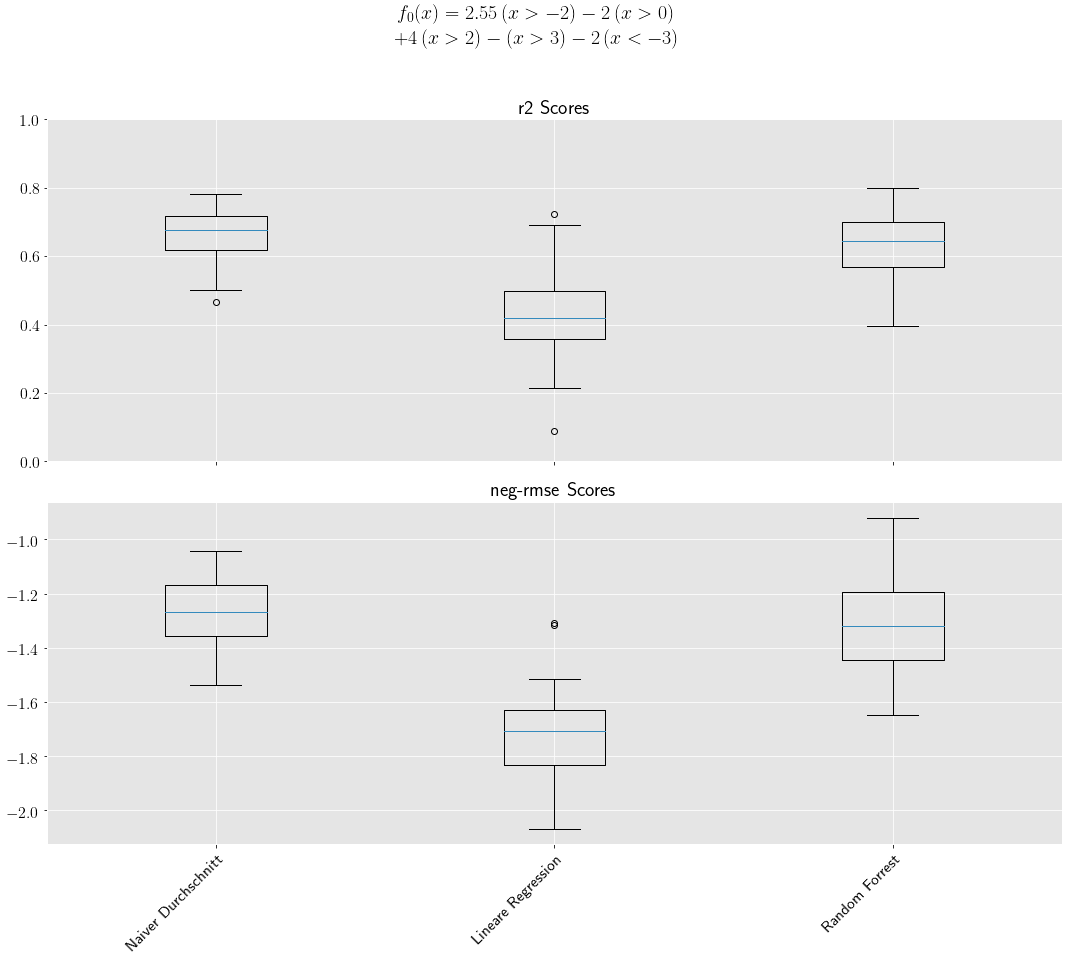

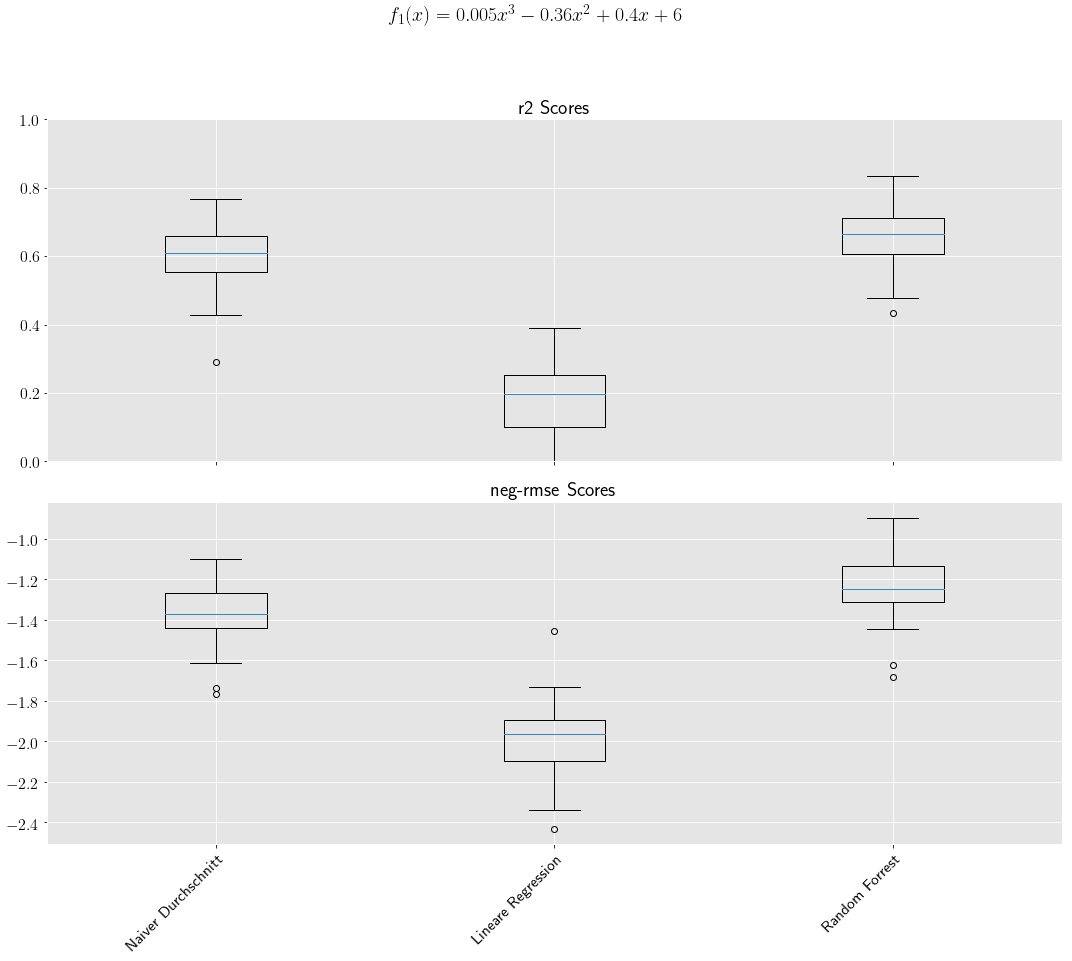

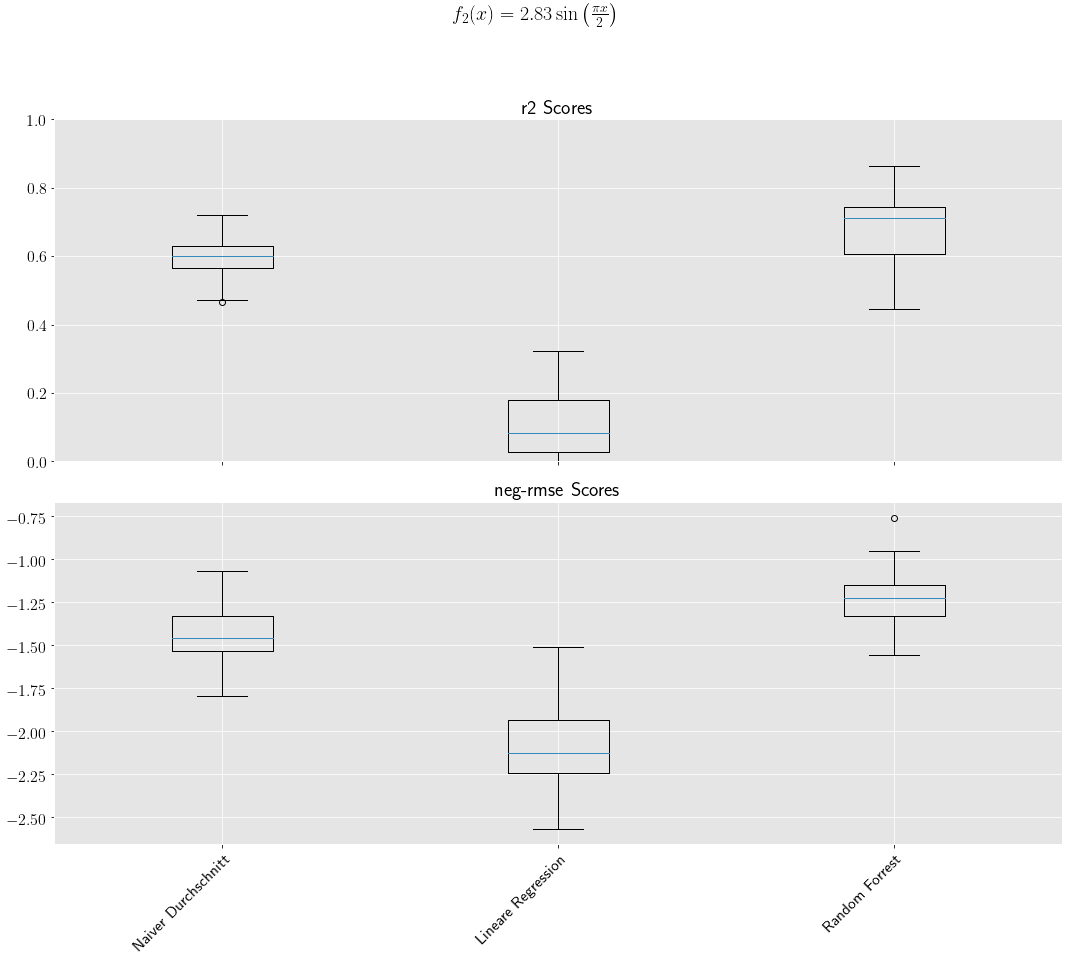

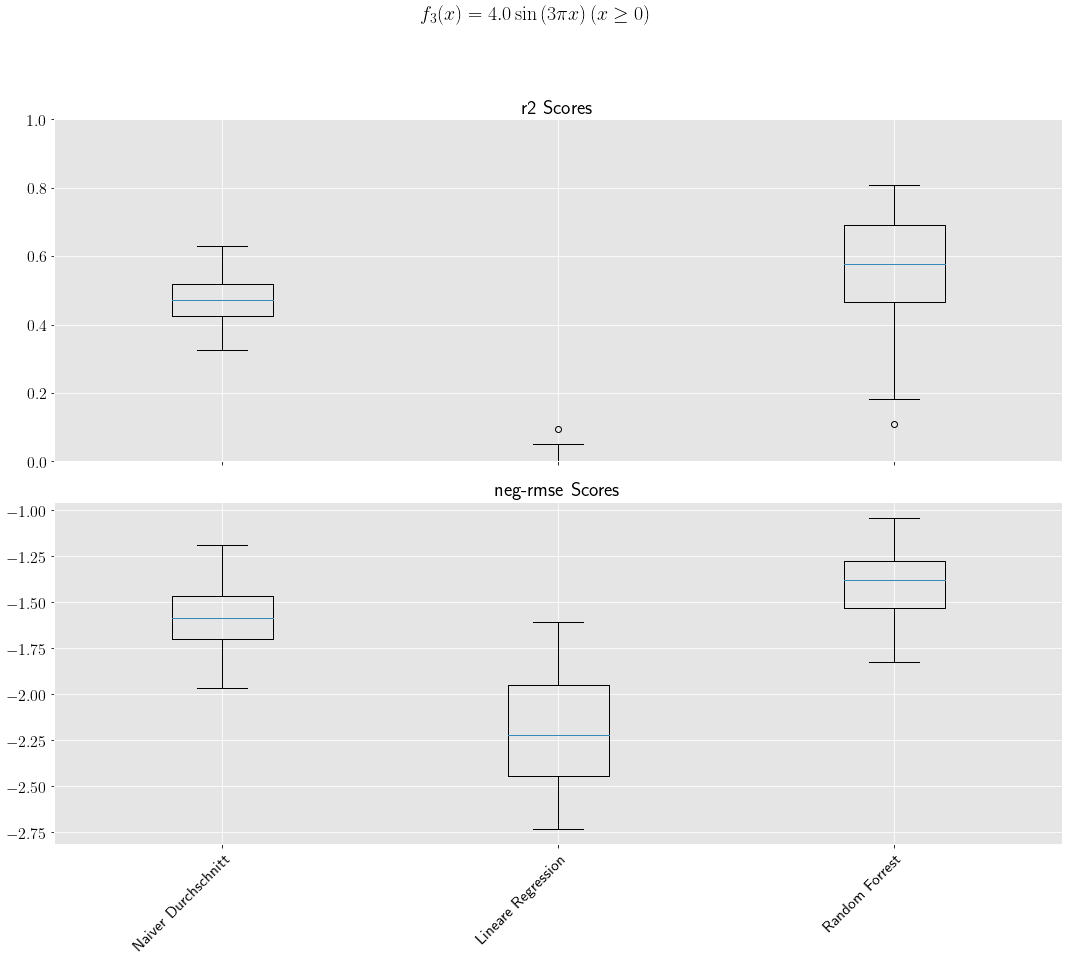

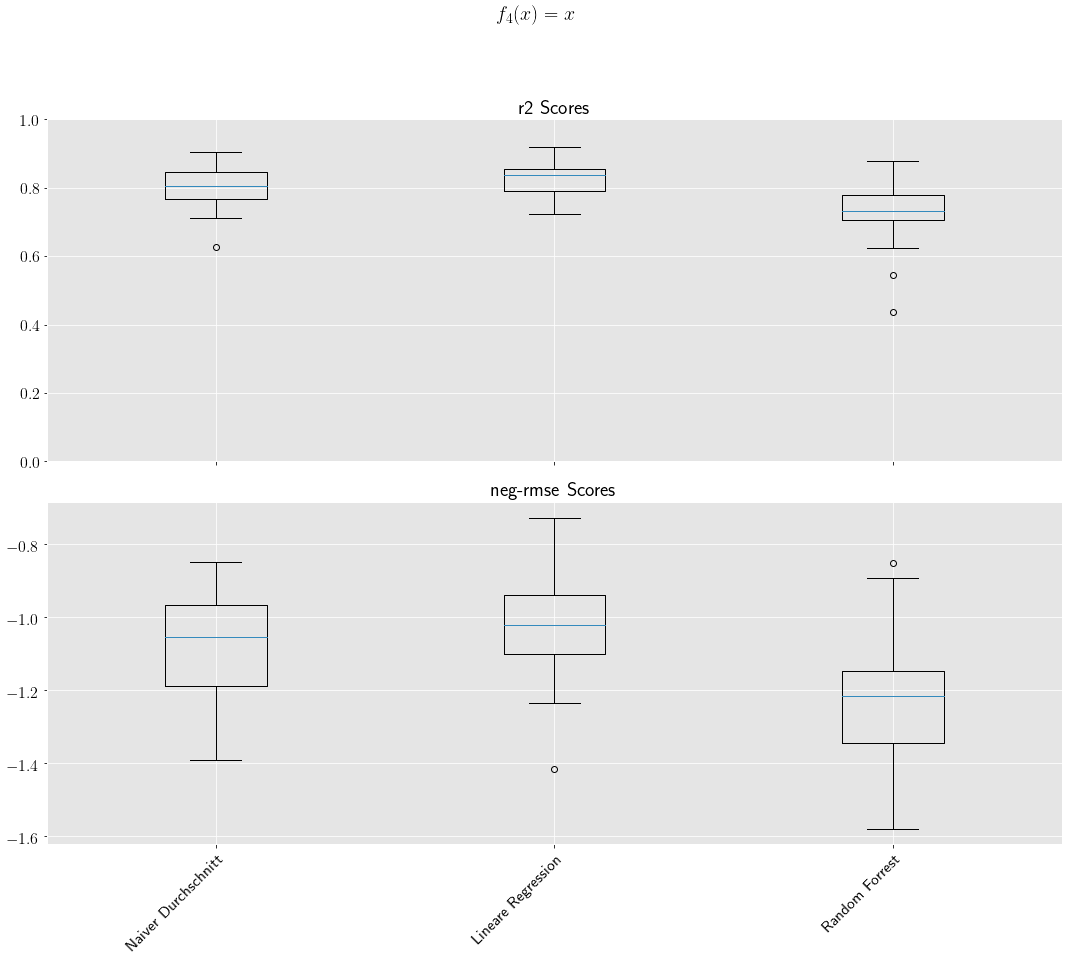

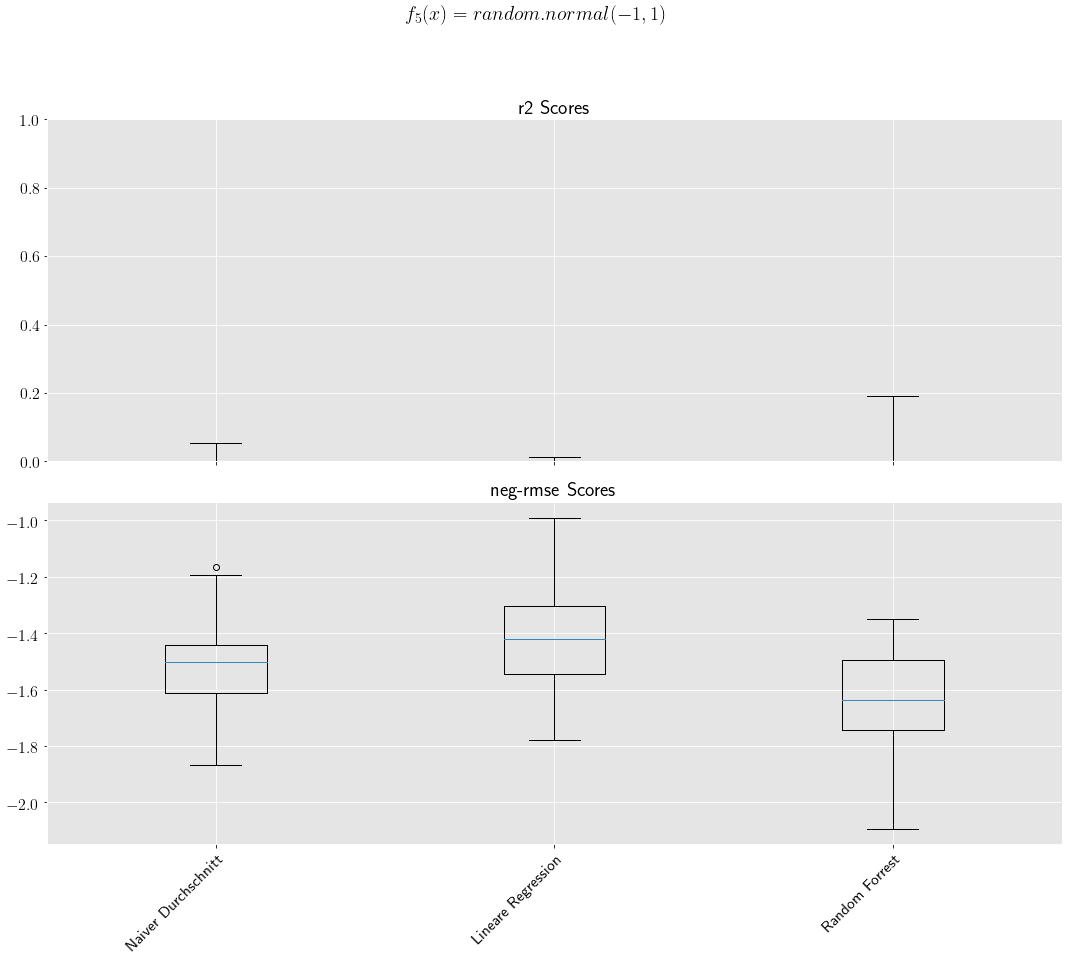

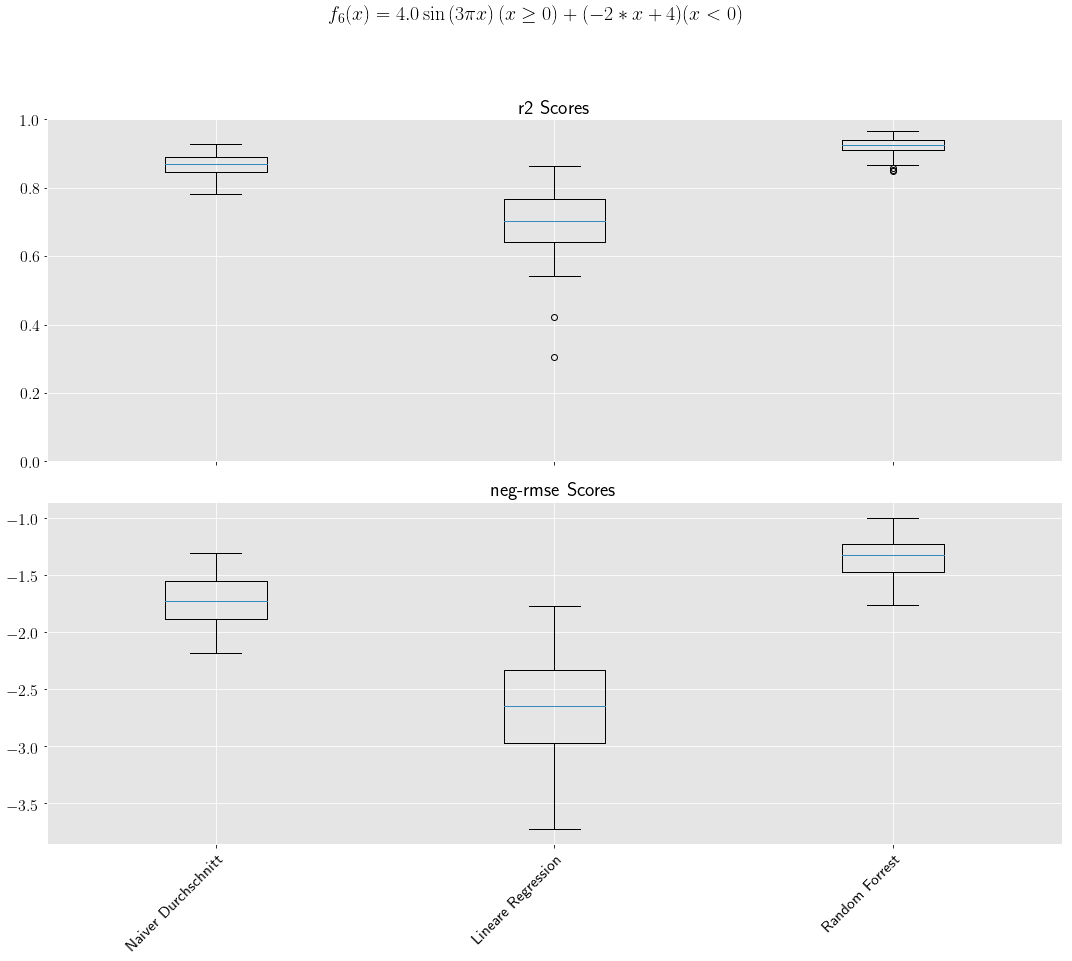

r2 [[ 0.660611    0.59584215  0.59805478  0.4720563   0.80448414 -0.1678658
   0.86478534]
 [ 0.4116096   0.15843207  0.09818121 -0.03988951  0.82479471 -0.04227151
   0.69008135]
 [ 0.63515761  0.66001193  0.68337888  0.56488901  0.73307111 -0.46857643
   0.919949  ]]


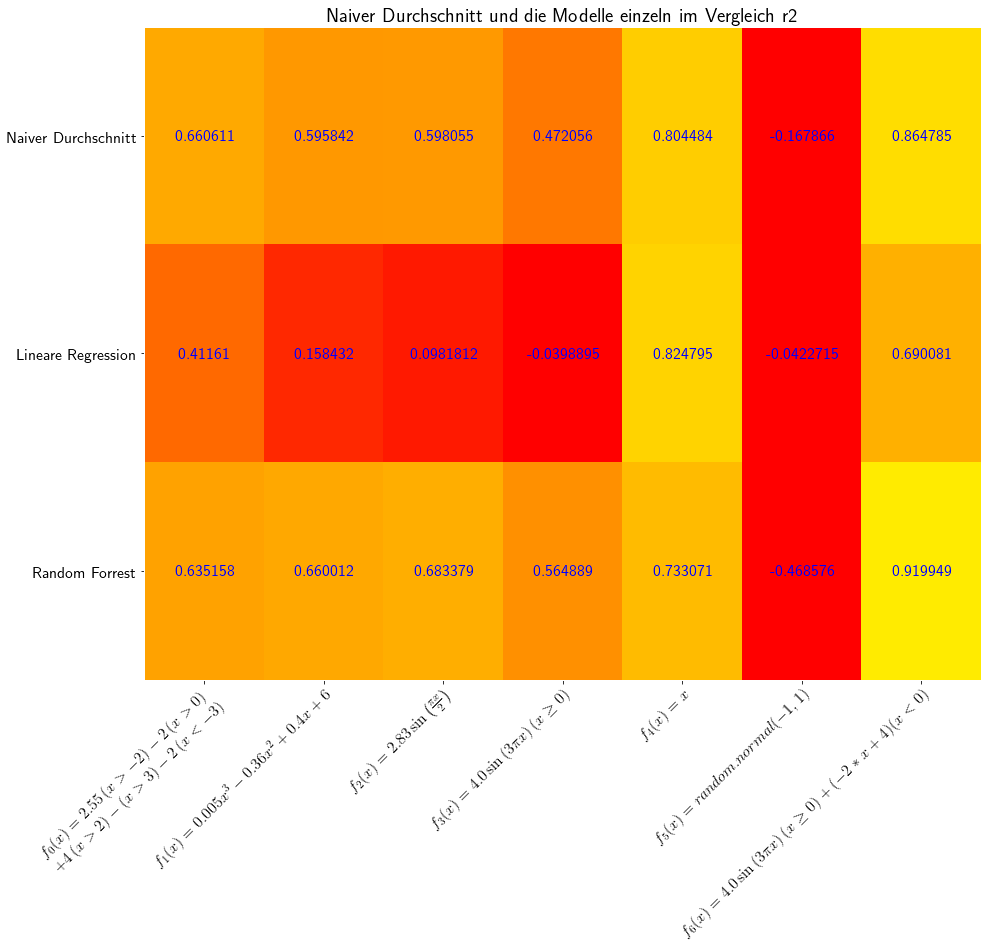

neg-rmse [[-1.26775867 -1.36984207 -1.44719835 -1.58284906 -1.0677799  -1.51480574
  -1.72791905]
 [-1.71691174 -1.99126027 -2.08365919 -2.22000398 -1.01342929 -1.41454532
  -2.6566919 ]
 [-1.31846201 -1.22950641 -1.22386426 -1.40843612 -1.22577033 -1.63931804
  -1.33696075]]


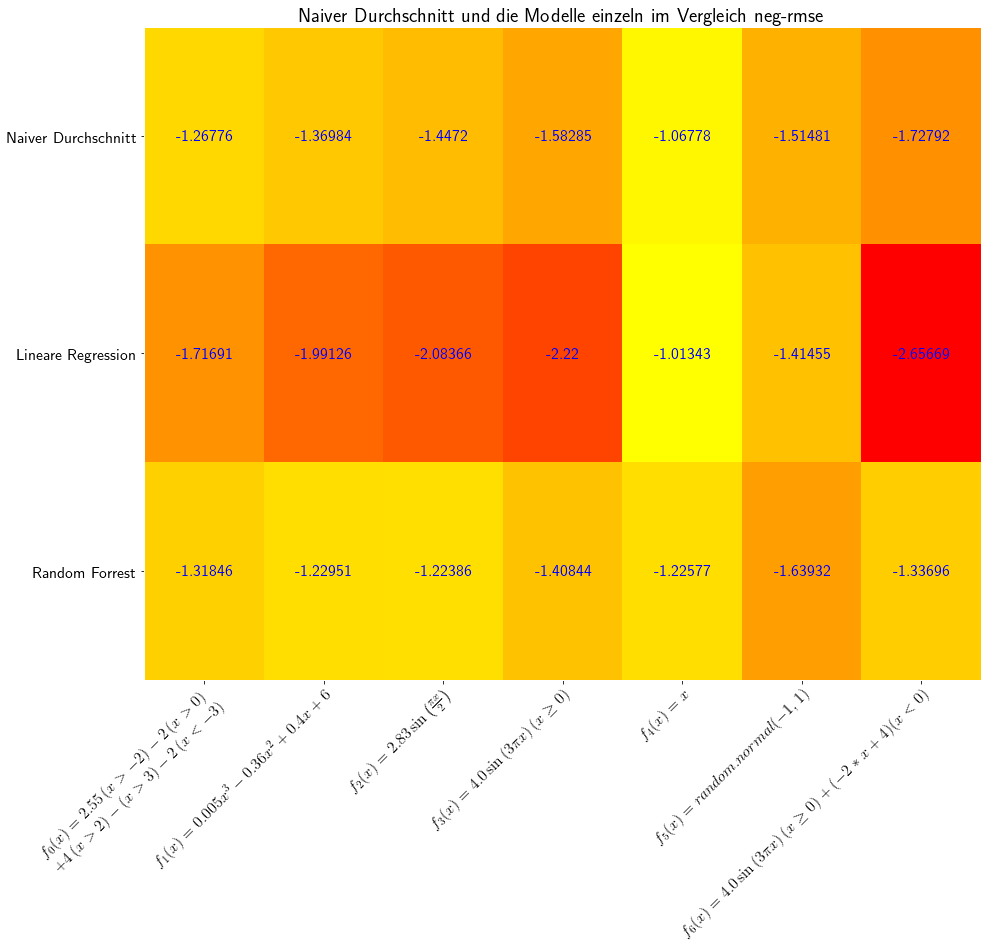

In [11]:
%run visualisation/visualisation_functions.ipynb

model_list = [(naive_averaging_model,"Naiver Durchschnitt"),
              (linear_regression_model,"Lineare Regression"),
              (random_forrest_model,"Random Forrest")]

t = compare_models(model_list,
               functions=function_list
               ,scores = {"r2":'r2', "neg-rmse": neg_rmse_score},
               score_ranges=[(0,1),(None,None)],
               title="Naiver Durchschnitt und die Modelle einzeln im Vergleich")


Es stellt sich heraus, dass die lineare Funktion $f_4(x)$ vom einfachen Durchscnitt schlechter Vorhergesagt wird, als von der linearen Regression, dies könnte daran liegen, dass der Random Forest die Vorhersagen der linearen Regression beim einfachen Durchschnitt negativ beinflusst.

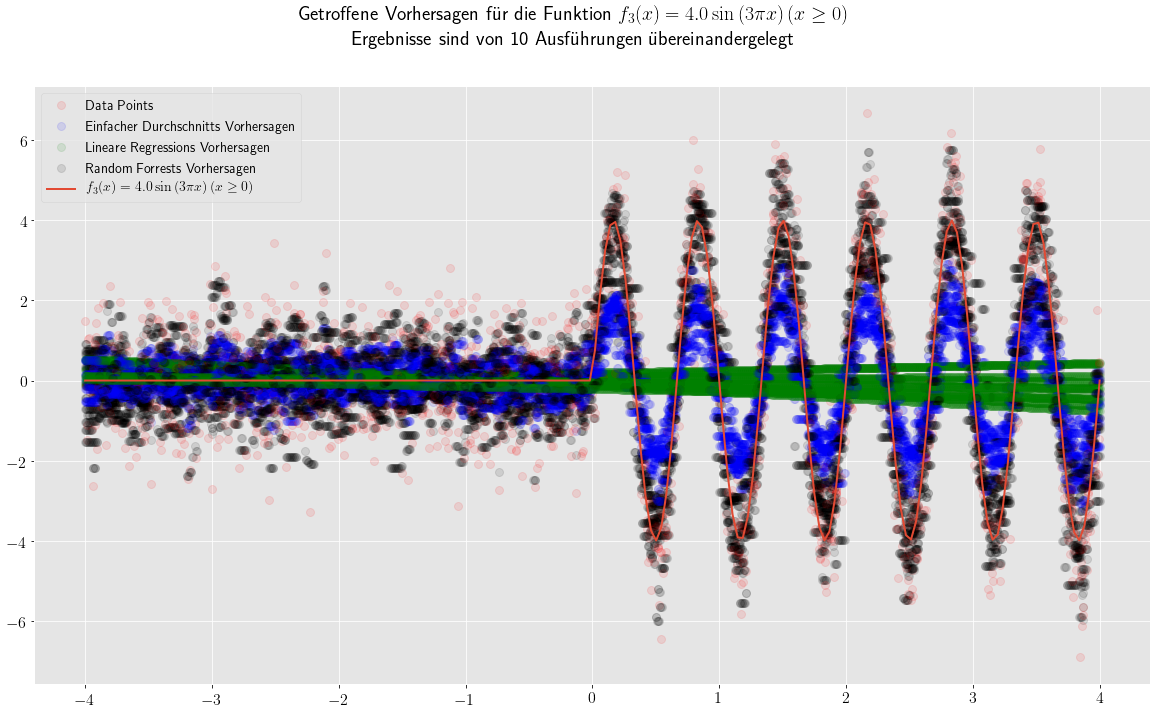

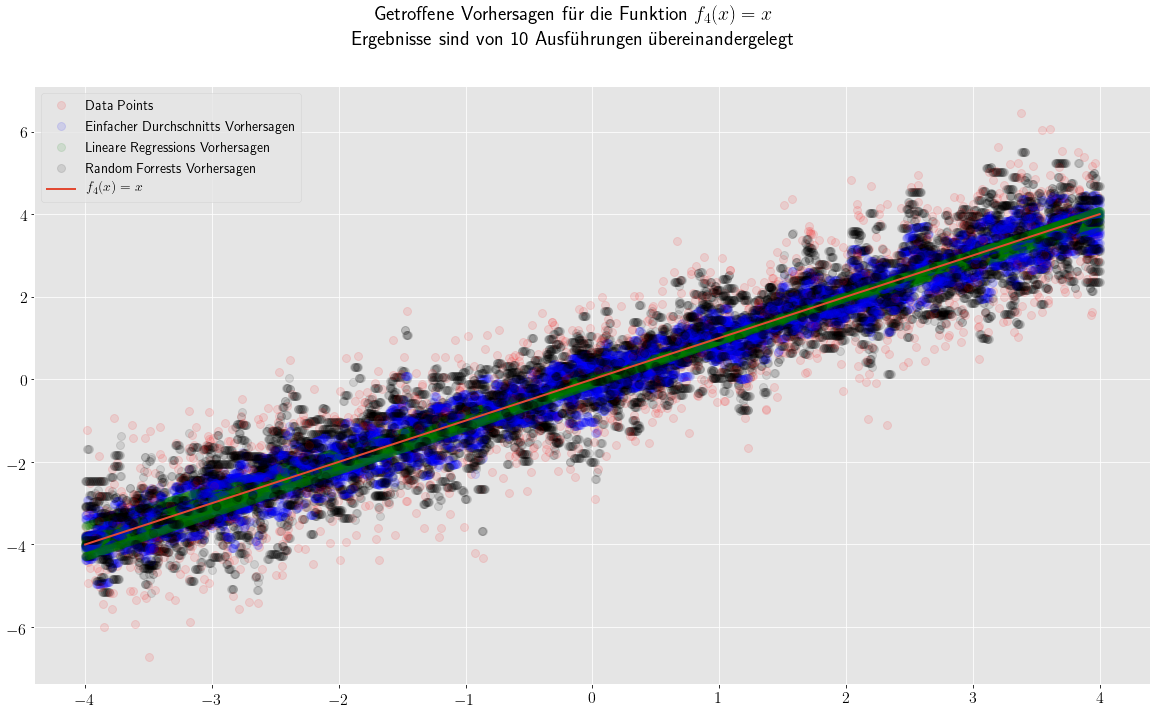

In [12]:
functions_to_observe = [function_list[3],function_list[4]]
for func in functions_to_observe:
    fig, axes = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(20,11)
    
    for i in range(10):
        X,y_noise = func.make(noise=1)
        naive_averaging_model.fit(X,y_noise)
        linear_regression_model.fit(X,y_noise)
        random_forrest_model.fit(X,y_noise)
        axes.plot(X,y_noise,'or',label="Data Points" if i==0 else "",alpha=.1)
        X=np.linspace(-4,4,num=1500).reshape(-1, 1)
    
        axes.plot(X,naive_averaging_model.predict(X),'ob',label="Einfacher Durchschnitts Vorhersagen" if i== 0 else "",alpha=0.1)
        axes.plot(X,linear_regression_model.predict(X),'ob',label="Lineare Regressions Vorhersagen" if i==0 else "",c='green',alpha=0.1)
        axes.plot(X,random_forrest_model.predict(X),'ob',label="Random Forrests Vorhersagen" if i==0 else "",c='black',alpha=0.1)
    
    func.plot(axes)
    fig.suptitle(f"Getroffene Vorhersagen für die Funktion {func} \n Ergebnisse sind von 10 Ausführungen übereinandergelegt", fontsize=20)
    axes.legend()
    fig.savefig(f"output_files/_dampening_{repr(func)[1:6]}.pdf", bbox_inches='tight')

    plt.plot()


print()

Random Forest eignet sich gut im die Sinuskurve vorherszusagen.

die Steigung der geraden is leicht negativ (vermutlich aufgrund des Rauschens). Auf der Abbildung ist zu erkennen, dass die Vorhersagen des einfachen Durchschnitts eine geringere Amplitude aufweisen, als die vom Random Forest. Der einfache Durchschnitt hat auch einen "glättenden" Effekt, sodass Overfitting Aufgrund von Außreißern in den Daten viel seltender auftritt. Dies müsste in einen weiteren Experiment untersucht werden. Im Moment ist dies nur eine Vermutung. Das linere Modell kann genaue Vorhersagen für den x < 0 Teil der Funktion $f_3(x)$ teffen aber der einfache Durchschnitt kann dies nicht erkennen und kombiniert die Modelle suboptimal.

Dies bestätigt, dass die Vorhersagekraft des einfachen Durchschnitts von der Wahl der Modelle abhängt, die verwendet werden.
Wenn mehr lineare Modelle verwendet werden, dann werden die Vorhersagen des einfachen Durchschnitts näher an den Vorhersagen der linearen Modelle angliedern.
Weil diese indirekt aufgrund der Verteilung stärker gewichtet werden.

Dies ist bekräftigt auch, dass die lineare Regression die aussagen vom Random Forest negativ beinflusst und auch, dass Random  Forest die aussagen vom linearen Regression negativ beinflussen kann. Dies welcher dieser Fälle eintritt hängt vom den Daten/Problem ab.